In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from models import SBN
from utils import summary

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'gray'] 

In [5]:
tree_dict_total, tree_names_total, tree_wts_total = summary('DS1', '../data/raw_data_DS1-11/')

In [7]:
emp_tree_freq = {tree_dict_total[tree_name]:tree_wts_total[i] for i, tree_name in enumerate(tree_names_total)}

In [8]:
taxa = tree_dict_total[tree_names_total[0]].get_leaf_names()

In [ ]:
K_v = [10000, 20000, 40000, 80000, 160000, 320000, 640000]
n_rep =10
kl_div_mat_freq = np.empty((n_rep, 7))

for rep in range(n_rep):
    for k, n_trees in enumerate(K_v):
        print 'rep {}, sample size: {}'.format(rep+1, n_trees)
        
        tree_id = np.load('../data/DS1/rep_{}/{}-samp-tree-dict.npy'.format(rep+1, n_trees)).item()
        tree_count_dict = np.load('../data/DS1/rep_{}/{}-samp-tree-count-dict.npy'.format(rep+1, n_trees)).item()
        
        model = SBN(taxa, emp_tree_freq)
        model.bn_train_count(tree_count_dict, tree_id)
        
        kl_div = model.kl_div(method='freq')
        kl_div_mat_freq[rep, k] = kl_div['freq']
    
        print 'rep {}, kl_div {}'.format(rep+1, kl_div_mat_freq[rep, k])

In [13]:
if not os.path.exists('../results/DS1/method'):
    os.makedirs('../results/DS1/method')
if not os.path.exists('../results/DS1/n_tree'):
    os.makedirs('../results/DS1/n-tree')

In [ ]:
K_v = [10000, 20000, 40000, 80000, 160000, 320000, 640000]
methods = ['ccd', 'sbn-sa', 'sbn-em', 'sbn-em-alpha']
n_rep = 10
reg_lam = 100.0
kl_div_mat = np.empty((n_rep, 7, 4))

for rep in range(n_rep):    
    output_methods = '../results/DS1/method/rep' + '{:02d}'.format(rep+1)
    output_n_unique_tree = '../results/DS1/n-tree/rep' +'{:02d}'.format(rep+1)

    kl_div_methods = open(output_methods, 'w')
    n_unique_tree = open(output_n_unique_tree, 'w')
    
    kl_div_methods.write('K'.ljust(8) + '\t'.join([str(method).ljust(13) for method in methods]) +'\n')
    n_unique_tree.write('\t'.join([str(n_tree).ljust(6) for n_tree in K_v]) +'\n')
    
    kl_div_methods.flush()
    n_unique_tree.flush()    
    
    for k, n_trees in enumerate(K_v):
        kl_div_methods.write('{:06d}'.format(n_trees))
        print 'rep {}, dataset {}, sample size {}, loading data'.format(rep, 'DS1', n_trees)
        tree_id = np.load('../data/DS1/rep_{}/{}-samp-tree-dict.npy'.format(rep+1, n_trees)).item()
        tree_count_dict = np.load('../data/DS1/rep_{}/{}-samp-tree-count-dict.npy'.format(rep+1, n_trees)).item()
        
        model = SBN(taxa, emp_tree_freq)
        model.bn_train_count(tree_count_dict, tree_id)

        kl_div = model.kl_div()
        kl_div_mat[rep, k, 0], kl_div_mat[rep, k, 1] = kl_div['ccd'], kl_div['bn']
        
        print 'SBN-EM training: rep {}, dataset {}, sample size {}'.format(rep, 'DS1', n_trees)
        logp = model.bn_em_count(tree_count_dict, tree_id, maxiter=1000, abstol=1e-05, monitor=True, MAP=False)
        kl_div_mat[rep, k, 2] = model.kl_div(method='bn')['bn']   
        
        model = SBN(taxa, emp_tree_freq, alpha=reg_lam/n_trees)
        print 'SBN-EM-ALPHA training: rep {}, dataset {}, sample size {}'.format(rep, 'DS1', n_trees)
        logp = model.bn_em_count(tree_count_dict, tree_id, maxiter=1000, abstol=1e-05, monitor=True, MAP=True)
        kl_div_mat[rep, k, 3] = model.kl_div(method='bn', MAP=True)['bn']
        
        kl_div_methods.write(''.join(['\t{:.11f}'.format(kl_div_mat[rep,k,l]) for l in range(4)]) + '\n')
        n_unique_tree.write(str(len(tree_count_dict)).ljust(6)+'\t')

        kl_div_methods.flush()
        n_unique_tree.flush()  

    n_unique_tree.write('\n')
    
    kl_div_methods.close()
    n_unique_tree.close()            

In [211]:
kl_div_mat_merg = np.concatenate((kl_div_mat, kl_div_mat_freq.reshape(n_rep, 7, -1)), axis=2)

In [26]:
model = SBN(taxa, emp_tree_freq)

In [27]:
logp = model.bn_em_prob(tree_dict_total, tree_names_total, tree_wts_total, maxiter=100, abstol=1e-05, monitor=True, MAP=False)

Iter 1: current per tree log-likelihood -2.954282
Iter 2: current per tree log-likelihood -2.950041
Iter 3: current per tree log-likelihood -2.949119
Iter 4: current per tree log-likelihood -2.948953
Iter 5: current per tree log-likelihood -2.948856
Iter 6: current per tree log-likelihood -2.948778
Iter 7: current per tree log-likelihood -2.948709
Iter 8: current per tree log-likelihood -2.948643
Iter 9: current per tree log-likelihood -2.948577
Iter 10: current per tree log-likelihood -2.948517
Iter 11: current per tree log-likelihood -2.948470
Iter 12: current per tree log-likelihood -2.948433
Iter 13: current per tree log-likelihood -2.948401
Iter 14: current per tree log-likelihood -2.948369
Iter 15: current per tree log-likelihood -2.948329
Iter 16: current per tree log-likelihood -2.948275
Iter 17: current per tree log-likelihood -2.948194
Iter 18: current per tree log-likelihood -2.948071
Iter 19: current per tree log-likelihood -2.947880
Iter 20: current per tree log-likelihood

In [28]:
bn_em_est_prob = [model.bn_estimate(tree_dict_total[tree_name]) for tree_name in tree_names_total]

In [45]:
sum(bn_em_est_prob), max(bn_em_est_prob)

(0.9994882515181007, 0.27499234412280765)

In [214]:
kl_div_mean = np.mean(kl_div_mat_merg, axis=0)
kl_div_std = np.std(kl_div_mat_merg, axis=0)

In [46]:
K_v = [10000, 20000, 40000, 80000, 160000, 320000, 640000]
labels={0:'ccd',1:'sbn-sa',2:'sbn-em',3:'sbn-em-'+r'$\alpha$',4:'srf'}
fmts={0:'-o',1:'-s',2:'-d',3:'-^',4:'--P'}
marksz={0:5,1:5,2:6,3:6,4:6}

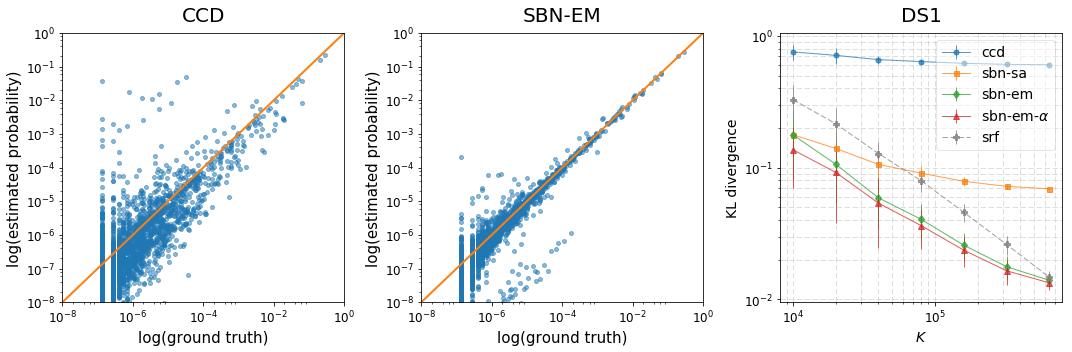

In [47]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.plot(tree_wts_total, ccd_est_prob, 'o', markersize=4, alpha=0.5)
ax1.set_xlim([1e-8,1])
ax1.set_ylim(ax1.get_xlim())
ax1.loglog([1e-8,1],[1e-8,1],linewidth=2)
ax1.set_title('CCD', y=1.02, fontsize=20)
ax1.set_xlabel('log(ground truth)',fontsize=15)
ax1.set_ylabel('log(estimated probability)',fontsize=15)
ax1.tick_params(labelsize=12)

ax2.plot(tree_wts_total, bn_em_est_prob, 'o', markersize=4, alpha=0.5)
ax2.set_xlim([1e-8,1])
ax2.set_ylim(ax2.get_xlim())
ax2.loglog([1e-8,1],[1e-8,1],linewidth=2)
ax2.set_title('SBN-EM', y=1.02, fontsize=20)
ax2.set_xlabel('log(ground truth)',fontsize=15)
ax2.set_ylabel('log(estimated probability)',fontsize=15)
ax2.tick_params(labelsize=12)


ax3.set_xscale('log')
ax3.set_yscale('log')
for i in [0,1,2,3,4]:
    ax3.errorbar(K_v, kl_div_mean[:,i], yerr=kl_div_std[:,i], c=colors[i], label=labels[i], fmt=fmts[i],markersize=marksz[i], alpha=0.75, linewidth=1)
    
leg = ax3.legend(loc='best',fontsize=14)
leg.get_frame().set_alpha(0.5)
ax3.grid(which='both', linestyle='--', alpha=0.5)
ax3.tick_params(labelsize=12)
ax3.set_xlabel(r'$K$', fontsize=14)
ax3.set_ylabel('KL divergence', fontsize=14)
ax3.set_title('DS1', y=1.02, fontsize=20)

plt.tight_layout()

plt.show()